In [0]:
import os
import math

from IPython import display
from matplotlib import style
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)

pd.options.display.float_format = "{:.3f}".format

style.use('ggplot')

os.chdir('/content/drive/ml_directory/recommend_this/juice_recommender/')

In [118]:
my_juice_df = pd.read_csv('juices_modified_dataset.csv')
display.display(my_juice_df.head())

my_juice_df = my_juice_df.reindex(np.random.permutation(my_juice_df.index))
display.display(my_juice_df.head())

,fid,juice_name,disease_cold,disease_soarthroat,disease_fever,disease_curing
0,1,Rock The Beet,0,0,1,fever
1,2,Turmeric Sunrise,0,0,1,fever
2,3,Lemon Drop,0,0,1,fever
3,4,Fennel to the Metal,0,0,1,fever
4,5,Dragon Blood,0,0,1,fever


,fid,juice_name,disease_cold,disease_soarthroat,disease_fever,disease_curing
9,10,Blackberry Pop,0,0,1,fever
7,8,Creamsicle,0,0,1,fever
28,29,Aloe,0,1,0,soarthroat
33,35,Apricot,0,1,0,soarthroat
41,43,Roasted Butternut Squash Garlic and Apple,1,1,0,cold_soarthroat


In [119]:
def category_conversion(df, series_name):
    return pd.to_numeric(pd.Categorical(df[series_name]).codes)


my_juice_df['disease_curing'] = category_conversion(my_juice_df,
                                                    "disease_curing")
display.display(my_juice_df.head())

### explicitly convert datatype of "disease_curing" column
my_juice_df['disease_curing'] = my_juice_df.disease_curing.astype('int32')
display.display(my_juice_df.head())

,fid,juice_name,disease_cold,disease_soarthroat,disease_fever,disease_curing
9,10,Blackberry Pop,0,0,1,4
7,8,Creamsicle,0,0,1,4
28,29,Aloe,0,1,0,5
33,35,Apricot,0,1,0,5
41,43,Roasted Butternut Squash Garlic and Apple,1,1,0,2


,fid,juice_name,disease_cold,disease_soarthroat,disease_fever,disease_curing
9,10,Blackberry Pop,0,0,1,4
7,8,Creamsicle,0,0,1,4
28,29,Aloe,0,1,0,5
33,35,Apricot,0,1,0,5
41,43,Roasted Butternut Squash Garlic and Apple,1,1,0,2


,fid,disease_cold,disease_soarthroat,disease_fever,disease_curing
count,65.000,65.000,65.000,65.000,65.000
mean,33.492,0.523,0.415,0.385,2.646
std,19.346,0.503,0.497,0.490,2.072
min,1.000,0.000,0.000,0.000,0.000
25%,17.000,0.000,0.000,0.000,0.000
50%,33.000,1.000,0.000,0.000,3.000
75%,50.000,1.000,1.000,1.000,4.000
max,66.000,1.000,1.000,1.000,6.000


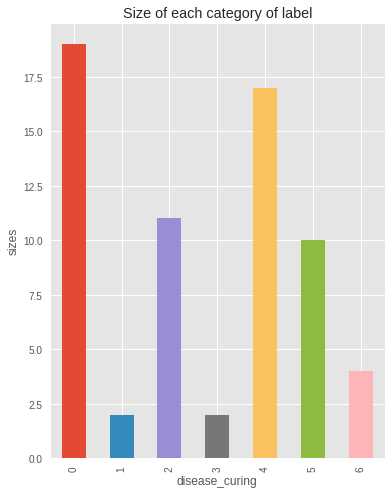

In [120]:
display.display(my_juice_df.describe())

### sizes of different labels
my_juice_df.groupby('disease_curing').size().plot(
    figsize=(6, 8), kind='bar', title="Size of each category of label")
plt.ylabel("sizes")
plt.show()

In [121]:
juice_name_array = np.array(list(my_juice_df.juice_name))

label_juice_encoder = LabelEncoder()
integer_juice_encoded = label_juice_encoder.fit_transform(juice_name_array)
print(integer_juice_encoded)
print(type(integer_juice_encoded))
integer_juice_encoded = list(integer_juice_encoded)
print(type(integer_juice_encoded))
print(len(integer_juice_encoded))

[ 3 10  0  1 47 42 17 14 23 26  4 64 46 11 20 18 28 63  2 62 24 30 15 54
 43 31  8 22 55 51 36 32 49  7 57 58 39 41 40 45 50 37  9 44 59 33 16 56
 25 61 53 19 34 38 52 60 12 13 35  5 29 21 48  6 27]
<class 'numpy.ndarray'>
<class 'list'>
65


In [122]:
my_juice_df["juice_encoded"] = integer_juice_encoded
display.display(my_juice_df.head())

,fid,juice_name,disease_cold,disease_soarthroat,disease_fever,disease_curing,juice_encoded
9,10,Blackberry Pop,0,0,1,4,3
7,8,Creamsicle,0,0,1,4,10
28,29,Aloe,0,1,0,5,0
33,35,Apricot,0,1,0,5,1
41,43,Roasted Butternut Squash Garlic and Apple,1,1,0,2,47


In [0]:
def preprocess_features(dataframe):
    features = [
        "juice_encoded", "disease_cold", "disease_soarthroat", "disease_fever"
    ]
    selected_features = dataframe[features]
    processed_features = selected_features.copy()
    return processed_features


def preprocess_targets(dataframe):
    output_targets = pd.DataFrame()
    output_targets["disease_curing"] = dataframe["disease_curing"]
    return output_targets

In [124]:
training_examples = preprocess_features(my_juice_df[0:])
training_targets = preprocess_targets(my_juice_df[0:])
display.display(training_examples.head())
display.display(training_targets.head())

,juice_encoded,disease_cold,disease_soarthroat,disease_fever
9,3,0,0,1
7,10,0,0,1
28,0,0,1,0
33,1,0,1,0
41,47,1,1,0


,disease_curing
9,4
7,4
28,5
33,5
41,2


In [0]:
def construct_feature_columns(input_features):
    return set([
        tf.feature_column.numeric_column(my_feature)
        for my_feature in input_features
    ])

In [0]:
def my_input_fn(features, targets, batch_size=1, shuffle=True,
                num_epochs=None):
    features = {key: np.array(value) for key, value in dict(features).items()}
    ds = Dataset.from_tensor_slices((features, targets))
    ds = ds.batch(batch_size).repeat(num_epochs)
    if shuffle:
        ds = ds.shuffle(buffer_size=50)
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

In [0]:
def train_nn_classification_model(my_optimizer, batch_size, steps,
                                  hidden_units, training_examples,
                                  training_targets):
    periods = 10
    steps_per_period = steps / periods

    ### create and configure optimizer
    my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(
        my_optimizer, 5.0)

    dnn_classifier = tf.estimator.DNNClassifier(
        feature_columns=construct_feature_columns(training_examples),
        n_classes=7,
        hidden_units=hidden_units,
        optimizer=my_optimizer)

    ### create input_fn
    training_input_fn = lambda: my_input_fn(training_examples,
                                            training_targets["disease_curing"],
                                            batch_size=batch_size)
    predict_training_input_fn = lambda: my_input_fn(training_examples,
                                                    training_targets['disease_curing'],
                                                    shuffle=False,
                                                    num_epochs=1)

    ### train the model
    print("Training the model...")
    print("  LogLoss error (on training data):")
    training_log_loss = []

    for period in range(0, periods):
        dnn_classifier.train(
            input_fn=training_input_fn, steps=steps_per_period)

        training_predictions = list(
            dnn_classifier.predict(input_fn=predict_training_input_fn))
        training_probabilities = np.array(
            [item['probabilities'] for item in training_predictions])
        training_pred_class_id = np.array(
            [item['class_ids'][0] for item in training_predictions])
        training_pred_one_hot = tf.keras.utils.to_categorical(
            training_pred_class_id, 7)

        training_loss_each_step = metrics.log_loss(training_targets,
                                                   training_pred_one_hot)

        print("    Period {:02d} : {:.7f}".format(period,
                                                  training_loss_each_step))
        training_log_loss.append(training_loss_each_step)
    print("Model training finished.")

    final_predictions = dnn_classifier.predict(
        input_fn=predict_training_input_fn)
    final_predictions = np.array(
        [item['class_ids'][0] for item in final_predictions])

    accuracy = metrics.accuracy_score(training_targets, final_predictions)
    print("\nFinal accuacy (on training) data : {:.4f}".format(accuracy))

    plt.ylabel("LogLoss")
    plt.xlabel("Periods")
    plt.title("LogLoss vs. Periods")
    plt.tight_layout()
    plt.plot(training_log_loss, label="training loss", color="magenta")
    plt.legend()
    plt.show()
    return dnn_classifier

Training the model...
  LogLoss error (on training data):
    Period 00 : 25.5055580
    Period 01 : 24.4428264
    Period 02 : 24.4428264
    Period 03 : 24.4428264
    Period 04 : 24.4428264
    Period 05 : 24.4428264
    Period 06 : 24.4428264
    Period 07 : 23.3800948
    Period 08 : 22.8487290
    Period 09 : 22.3173632
Model training finished.

Final accuacy (on training) data : 0.3538


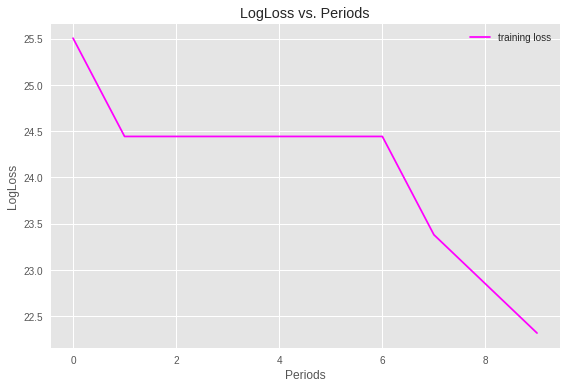

In [130]:
dnn_classifier = train_nn_classification_model(
    my_optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.005),
    batch_size=3,
    steps=500,
    hidden_units=[8, 7, 6, 4],
    training_examples=training_examples,
    training_targets=training_targets)